<a href="https://colab.research.google.com/github/enikolaev/Sentinel2Imaginary/blob/main/Layers_From_Tiff_for_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!wget https://raw.githubusercontent.com/enikolaev/Sentinel2Imaginary/refs/heads/main/indexes_calculate.py

--2025-02-03 15:22:01--  https://raw.githubusercontent.com/enikolaev/Sentinel2Imaginary/refs/heads/main/indexes_calculate.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6268 (6.1K) [text/plain]
Saving to: ‘indexes_calculate.py.1’

indexes_calculate.p 100%[===================>]   6.12K  --.-KB/s    in 0s      

2025-02-03 15:22:01 (57.7 MB/s) - ‘indexes_calculate.py.1’ saved [6268/6268]



In [59]:
import cv2
import tifffile
from indexes_calculate import Indexes
import numpy as np

In [60]:
class LayersFromTiff:
    def __init__(self, layers_num):
      self.layers_num = layers_num

    def get_layer(self, index_no, img):
        assert 0<=index_no<self.layers_num, "Нет такого слоя"
        return np.nan_to_num(img[:, :, index_no:index_no+1])
        # return img[:, :, index_no:index_no+1]

    def get_all_layers(self, img):
        ls = {}
        for layer in range(0, self.layers_num):
            ls[layer] = self.get_layer(layer, img)
        return ls

    def get_color_from_layer(self,  layer):
        norm_index = cv2.normalize(layer, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        h, w = norm_index.shape
        color_index = np.zeros((h, w, 3))
        color_index[:, :, 1] = norm_index
        return color_index
    def get_color_from_layer1(self,  layer):
        norm_index = cv2.normalize(layer, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        h, w = norm_index.shape
        color_index = np.zeros((h, w, 3))
        color_index[:, :, 1] = norm_index
        color_index[:, :, 0] = norm_index // 2
        color_index[:, :, 2] = norm_index // 2
        return color_index

In [61]:
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/00_2017-01-11_08-23.tiff
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/01_2017-01-31_08-21.tiff
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/02_2017-02-10_08-22.tiff
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/03_2017-02-20_08-20.tiff
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/04_2017-03-12_08-19.tiff
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/05_2017-04-01_08-26.tiff
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/06_2017-04-11_08-24.tiff
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/07_2017-05-01_08-24.tiff
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/08_2017-05-11_08-20.tiff
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/09_2017-05-31_08-20.tiff
# !wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/13_2017-07-10_08-20.tiff
!wget -q https://github.com/enikolaev/Sentinel2Imaginary/raw/refs/heads/main/data/Fig2/248_2019-07-17_08-17.tiff

In [ ]:
!mkdir res

In [ ]:
# !rm -r res
# !rm *.png

In [ ]:
from tifffile import imread, imwrite
out_dir = "./res"
path_to_original_img = "248_2019-07-17_08-17.tiff"
original_img = imread(path_to_original_img)
print(original_img.shape)
layers = LayersFromTiff(original_img.shape[2])

# Извлечём все доступные слои
all_layers_data = layers.get_all_layers(original_img)
for i, data in all_layers_data.items():
    # imwrite(f"path/to/test_{index_name}.tiff", index_image)
    cv2.imwrite(f"{out_dir}/B{i:02}.png", layers.get_color_from_layer1(data))

(255, 170, 15)


red:  4872
green:  5000
blue:  5176


Text(0.5, 1.0, 'cv')

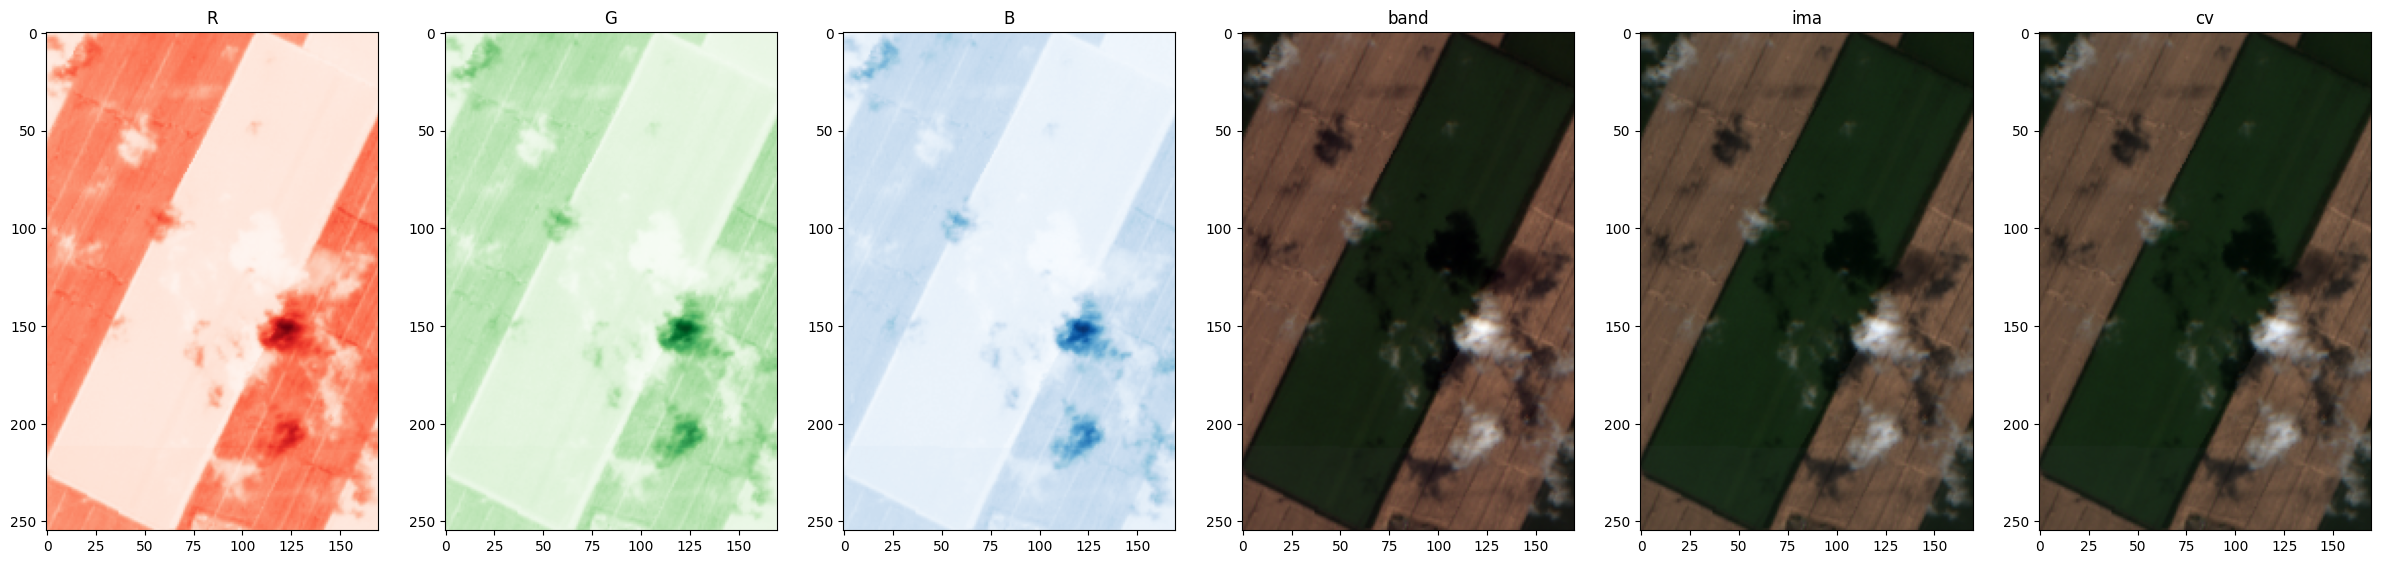

In [62]:
def custom_band_norm(channel_data):
  return cv2.normalize(channel_data, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

def custom_im_norm(ima):
    ima_min, ima_max = (ima.min(), ima.max())
    return ((ima-ima_min)/((ima_max - ima_min)))

def brighten(band):
    alpha=1.1
    beta=0
    return np.clip(alpha*band+beta, 0, 255)

def gammacorr(band):
    gamma=2
    return np.power(band, 1/gamma)

fig = plt.figure(figsize=(30,15))
ROWS = 1
COLS = 6

print('red: ', all_layers_data[3].max())
print('green: ', all_layers_data[2].max())
print('blue: ', all_layers_data[1].max())

red, green, blue = all_layers_data[3], all_layers_data[2], all_layers_data[1]

ax1 = fig.add_subplot(ROWS,COLS,1)
ax1.imshow(red, cmap='Reds')
ax1.set_title('R')

ax1 = fig.add_subplot(ROWS,COLS,2)
ax1.imshow(green, cmap='Greens')
ax1.set_title('G')

ax1 = fig.add_subplot(ROWS,COLS,3)
ax1.imshow(blue, cmap='Blues')
ax1.set_title('B')


rgb_data1 = np.dstack((custom_band_norm(red),
                      custom_band_norm(green),
                      custom_band_norm(blue)))
ax1 = fig.add_subplot(ROWS,COLS,4)
ax1.imshow(rgb_data1)
ax1.set_title('band')

rgb_data2 = custom_im_norm( np.dstack((red, green, blue)) )
ax1 = fig.add_subplot(ROWS,COLS,5)
ax1.imshow(rgb_data2)
ax1.set_title('ima')

rgb_data3 =  cv2.normalize(original_img[:, :, 3:0:-1], None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
ax1 = fig.add_subplot(ROWS,COLS,6)
ax1.imshow(rgb_data3)
ax1.set_title('cv')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
RAWS = 3
COLS = original_img.shape[2] // 3

# fig, ax = plt.subplots(nrows=RAWS, ncols=COLS, figsize=(20,20), sharey=True, sharex=True)
# for i, axi in enumerate(ax.flat):
#   layer_no, layer_data = i, all_layers_data[i]
#   # img = mpimg.imread(f"test_{index_name}.png")
#   cax = axi.imshow(layer_data, alpha=0.9)

#   # cv2.imwrite(f"B{i+1}.png", layer_data)
#   # mpimg.imsave(f"B{i+1}.png", layer_data)
#   # cbar = fig.colorbar(cax)
#   # ticks = np.linspace(layer_data.min(), layer_data.max(), num=5)
#   # cbar.set_ticks(ticks)
#   # plt.axis('off')
#   axi.set_title(f"{i}/B{i+1}")
# # plt.colorbar()
# plt.show()

for k in all_layers_data:
  fname = f"B{k:02}.png"
  ima = all_layers_data[k]
  fig, ax = plt.subplots(figsize=(17,25))
  ax.imshow(ima, alpha=0.9)
  plt.savefig(fname)



In [72]:
!wget https://raw.githubusercontent.com/enikolaev/Sentinel2Imaginary/refs/heads/main/indexes_calculate.py

--2025-02-03 17:08:12--  https://raw.githubusercontent.com/enikolaev/Sentinel2Imaginary/refs/heads/main/indexes_calculate.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6268 (6.1K) [text/plain]
Saving to: ‘indexes_calculate.py’

indexes_calculate.p 100%[===================>]   6.12K  --.-KB/s    in 0s      

2025-02-03 17:08:13 (56.9 MB/s) - ‘indexes_calculate.py’ saved [6268/6268]



In [91]:
!mkdir indexes1

In [92]:
def GetColors(layer):
        norm_index = cv2.normalize(layer, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        h, w = norm_index.shape
        color_index = np.zeros((h, w, 3))
        color_index[:, :, 1] = norm_index
        # color_index[:, :, 0] = norm_index
        # color_index[:, :, 2] = norm_index
        return color_index

indexes = Indexes()

# Вывод на консоль допустимых имён индексов, для которых предусмотрена реализация
print(indexes.get_available_index_names())

# читаем 15тиканальное изображение
from tifffile import imread, imwrite

output_path = './'

# Извлечём индекс SR из снимка
original_img = imread(path_to_original_img)
SR_index = indexes.get_index("SR", original_img)

# сохраним этот индекс в tiff и в цвете
imwrite(output_path + "test_SR.tiff", SR_index)
cv2.imwrite(output_path + "test_SR.png", indexes.get_color_from_index(SR_index))

# Извлечём все доступные индексы из изображения и сохраним каждый по названию индекса
all_indexes_from_one_image = indexes.create_all_indexes_from_img(original_img)
for index_name, index_image in all_indexes_from_one_image.items():
    # imwrite(output_path + f"test_{index_name}.tiff", index_image)
    cv2.imwrite(output_path + f"indexes/{index_name}.png", GetColors(index_image))

['NDWI', 'NDMI', 'NDVI', 'SR', 'EVI', 'EVI2', 'ARVI', 'SAVI', 'GOSAVI', 'GARI', 'VARI']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

all_indexes = indexes.get_available_index_names()
RAWS = 1
COLS = len(all_indexes)
target_dir = './indexes'

# fig, ax = plt.subplots(nrows=RAWS, ncols=COLS, figsize=(12,120), sharey=True, sharex=True)
# for i, axi in enumerate(ax.flat):
#   index_name = all_indexes[i]
#   img = mpimg.imread(f"test_{index_name}.png")
#   axi.imshow(img, alpha=0.7)
#   plt.axis('off')
#   axi.set_title(index_name)
# plt.show()

target_dir = './indexes1'
for index_name, index_image in all_indexes_from_one_image.items():
  fname = target_dir + f"/{index_name}.png"
  ima = index_image
  fig, ax = plt.subplots(figsize=(17,25))
  ax.imshow(ima, alpha=0.9)
  plt.savefig(fname)